In [22]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [2]:
data = pd.read_excel("C:\\Users\\Riallen\\Documents\\Print_de_telas\\data2\\data_geral.xlsx")
data.head()

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9
1,1.83,1930,Mon Feb 13 09:34:36 2023,2023-02-13 09:34:36,2023-02-13,09:34:36,9
2,4.48,2073,Mon Feb 13 09:35:07 2023,2023-02-13 09:35:07,2023-02-13,09:35:07,9
3,6.58,2104,Mon Feb 13 09:35:42 2023,2023-02-13 09:35:42,2023-02-13,09:35:42,9
4,1.53,2065,Mon Feb 13 09:36:01 2023,2023-02-13 09:36:01,2023-02-13,09:36:01,9


In [3]:
i = 0
t = len(data['Hora_Aposta'])
#print(t)
segundo = []
minuto = []
for j in range(0,t):
    #print(data['Hora_Aposta'][j])
    #print(data['Hora_Aposta'][j].split(":"))
    x = data['Hora_Aposta'][j].split(":")
    segundo.append(float(x[2]))
    minuto.append(float(x[1]))

for j in range(0,t):
    segundo[j] = segundo[j]/60
    minuto[j] = minuto[j] + round(segundo[j],6)

for j in range(0,t):
    minuto[j] = round(minuto[j]/60, 6)

data['hour_edi'] = data['hour']
for j in range(0,t):
    data['hour_edi'][j] = data['hour_edi'][j] + minuto[j]

data['hour_edi']

C:\Users\Riallen\AppData\Local\Temp\ipykernel_8648\1362838707.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour_edi'][j] = data['hour_edi'][j] + minuto[j]


0       9.571667
1       9.576667
2       9.585278
3       9.595000
4       9.600278
          ...   
3302    9.473889
3303    9.479722
3304    9.484444
3305    9.488611
3306    9.495556
Name: hour_edi, Length: 3307, dtype: float64

In [5]:
data1 = data.head(2314)
data1

,Odds,Qt_Apostadores,Time_Odds,Data_Hora_Aposta,Date_Aposta,Hora_Aposta,hour,hour_edi
0,1.01,1976,Mon Feb 13 09:34:18 2023,2023-02-13 09:34:18,2023-02-13,09:34:18,9,9.571667
1,1.83,1930,Mon Feb 13 09:34:36 2023,2023-02-13 09:34:36,2023-02-13,09:34:36,9,9.576667
2,4.48,2073,Mon Feb 13 09:35:07 2023,2023-02-13 09:35:07,2023-02-13,09:35:07,9,9.585278
3,6.58,2104,Mon Feb 13 09:35:42 2023,2023-02-13 09:35:42,2023-02-13,09:35:42,9,9.595000
4,1.53,2065,Mon Feb 13 09:36:01 2023,2023-02-13 09:36:01,2023-02-13,09:36:01,9,9.600278
...,...,...,...,...,...,...,...,...
2309,7.66,690,Tue Feb 14 02:51:10 2023,2023-02-14 02:51:10,2023-02-14,02:51:10,2,2.852778
2310,37.14,738,Tue Feb 14 02:52:05 2023,2023-02-14 02:52:05,2023-02-14,02:52:05,2,2.868056
2311,1.19,684,Tue Feb 14 02:52:18 2023,2023-02-14 02:52:18,2023-02-14,02:52:18,2,2.871667
2312,2.19,537,Tue Feb 14 02:52:38 2023,2023-02-14 02:52:38,2023-02-14,02:52:38,2,2.877222


In [6]:
df = pd.concat([data1['Data_Hora_Aposta'], data1['Odds']], axis = 1)

In [7]:
df['Data_Hora_Aposta'] = pd.to_datetime(df['Data_Hora_Aposta'])
df.set_index('Data_Hora_Aposta', inplace=True)

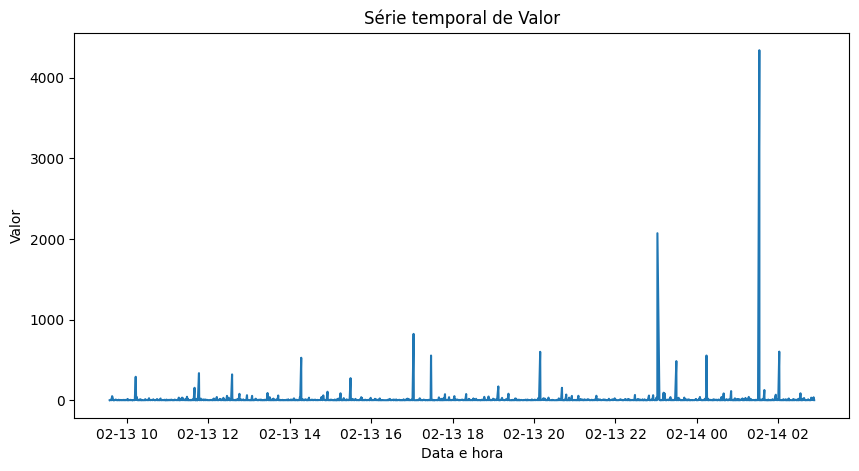

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df)
plt.title('Série temporal de Valor')
plt.xlabel('Data e hora')
plt.ylabel('Valor')
plt.show()


In [13]:
decomp = seasonal_decompose(df, period = 140)
trend = decomp.trend
seasonal = decomp.seasonal
resid = decomp.resid


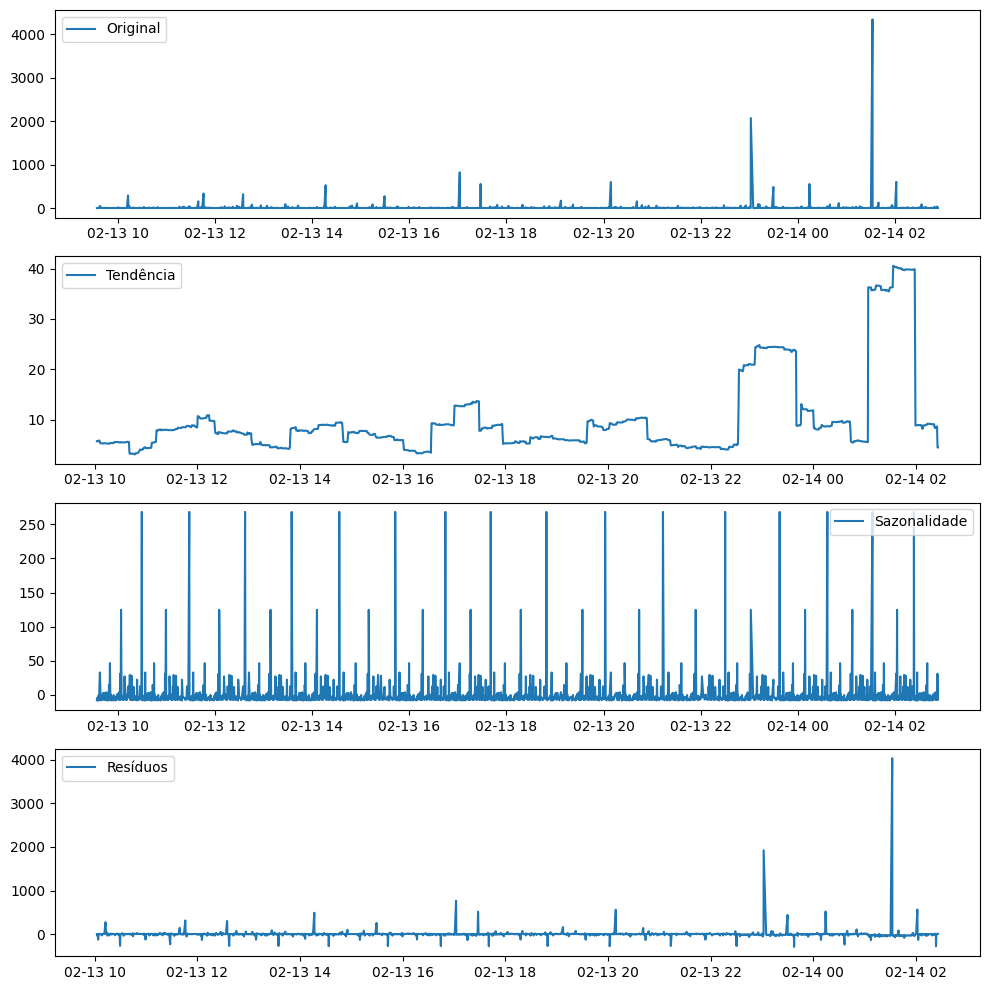

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendência')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Sazonalidade')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(resid, label='Resíduos')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [40]:
model = ARIMA(df, order=(10,5,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=140)


c:\Users\Riallen\Documents\Print_de_telas\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Riallen\Documents\Print_de_telas\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Riallen\Documents\Print_de_telas\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Riallen\Documents\Print_de_telas\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

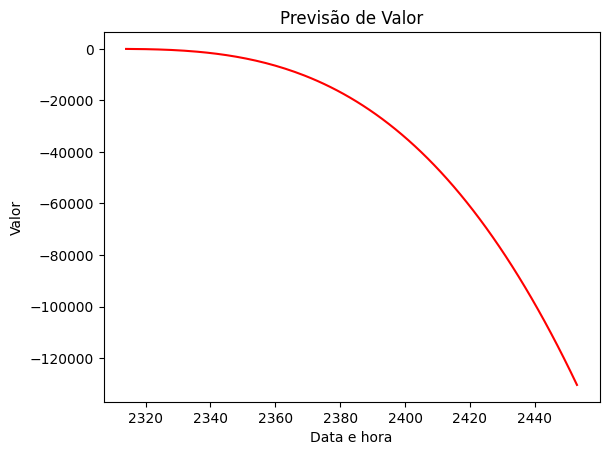

In [41]:
plt.plot(forecast, color='red')
plt.title('Previsão de Valor')
plt.xlabel('Data e hora')
plt.ylabel('Valor')
plt.show()


In [37]:
modelo_auto = auto_arima(df, seasonal = False)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2314
Model:                        SARIMAX   Log Likelihood              -14081.298
Date:                Wed, 15 Feb 2023   AIC                          28166.597
Time:                        18:50:05   BIC                          28178.090
Sample:                             0   HQIC                         28170.786
                               - 2314                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.9736      6.043      1.650      0.099      -1.871      21.818
sigma2       1.13e+04     36.298    311.339      0.000    1.12e+04    1.14e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):         151289119.57
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):              36.48   Skew:                            32.94
Prob(H) (two-sided):                  0.00   Kurtosis:                      1253.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
proximos_12 = modelo_auto.predict(n_periods = 50)
# Visualização dos próximos 12 valores
proximos_12 

c:\Users\Riallen\Documents\Print_de_telas\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2314    9.973565
2315    9.973565
2316    9.973565
2317    9.973565
2318    9.973565
2319    9.973565
2320    9.973565
2321    9.973565
2322    9.973565
2323    9.973565
2324    9.973565
2325    9.973565
2326    9.973565
2327    9.973565
2328    9.973565
2329    9.973565
2330    9.973565
2331    9.973565
2332    9.973565
2333    9.973565
2334    9.973565
2335    9.973565
2336    9.973565
2337    9.973565
2338    9.973565
2339    9.973565
2340    9.973565
2341    9.973565
2342    9.973565
2343    9.973565
2344    9.973565
2345    9.973565
2346    9.973565
2347    9.973565
2348    9.973565
2349    9.973565
2350    9.973565
2351    9.973565
2352    9.973565
2353    9.973565
2354    9.973565
2355    9.973565
2356    9.973565
2357    9.973565
2358    9.973565
2359    9.973565
2360    9.973565
2361    9.973565
2362    9.973565
2363    9.973565
dtype: float64

In [ ]:
data1 = data[data['Date_Aposta'] == '2023-02-13']
data2 = data[data['Date_Aposta'] == '2023-02-14']